Student Performance Indicator

Life Cycle of this Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to be performed
4. EDA
5. Data Pre-Processing
6. Model Training
7. Choosing the best model


Problem Statement

This project understands hows the student's performance is affected by other variables such as gender, ethinicity, parental level of education, lunch and test preparation scores.

Data Collection

Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977



Importing pandas, matplotlib, numpy, seaborn libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/data')

In [6]:
df.shape

(1000, 8)

Check Missing Values


1. Check Missing Values
2. Check duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in categorical columns

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Looks like there are no missing values in the dataset

In [8]:
df.duplicated().sum()

##if there are duplicates use df.drop_duplicates()

0

Looks like there are no duplicates in the data set

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking number of unique values in the dataset

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Looks like the means are very close to eachother for all the scores.
Standard deviations are also close to each other.
Minimum for math is 0 and for writing is 10 and reading is 17

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' column: ",end= ' ')
print(df['gender'].unique())
print("Categories in 'race/ethnicity' column: ", end = ' ')
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' column: ", end = ' ')
print(df['parental level of education'].unique())
print("Categories in 'lunch' parental level of education' column: ", end = ' ')
print(df['lunch'].unique())
print("Categories in 'test preparation course' column: ", end = ' ')
print(df['test preparation course'].unique())

Categories in 'gender' column:  ['female' 'male']
Categories in 'race/ethnicity' column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' parental level of education' column:  ['standard' 'free/reduced']
Categories in 'test preparation course' column:  ['none' 'completed']


In [14]:
numerical_features = [f for f in df.columns if df[f].dtype != 'O']
categorical_features = [f for f in df.columns if df[f].dtype == 'O']

print(numerical_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Let's add new columns for total score and average score for all three scores.

In [15]:
df['total score'] = df['math score'] + df['writing score'] + df['reading score']

In [16]:
df['avg score'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
print('Student with math score 100: ', end=' ')
print(df[df['math score'] == 100]['math score'].count())
print('Student with reading score 100: ', end=' ')
print(df[df['reading score'] == 100]['math score'].count())
print('Student with writing score 100: ', end=' ')
print(df[df['writing score'] == 100]['math score'].count())

Student with math score 100:  7
Student with reading score 100:  17
Student with writing score 100:  14


In [18]:
print('Student with bad math score: ', end=' ')
print(df[df['math score'] <20]['math score'].count())
print('Student with bad reading score: ', end=' ')
print(df[df['reading score'] < 20]['math score'].count())
print('Student with bad writing score: ', end=' ')
print(df[df['writing score'] < 20]['math score'].count())

Student with bad math score:  4
Student with bad reading score:  1
Student with bad writing score:  3


Exploring Data

Histogram and Kernel Distribution Function


<Axes: xlabel='avg score', ylabel='Count'>

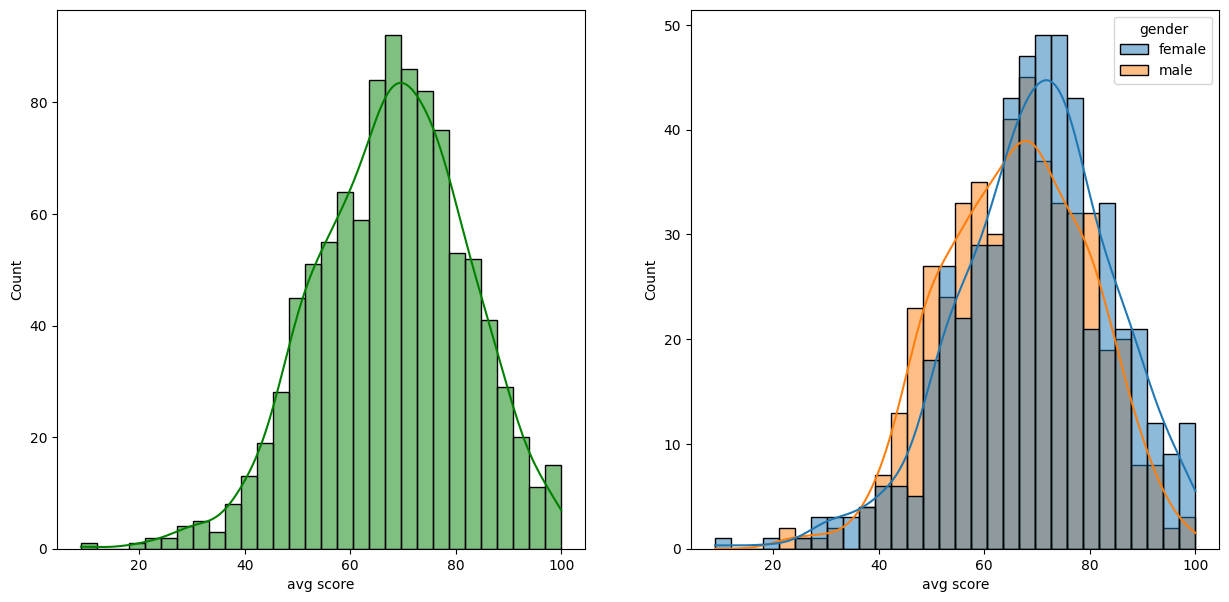

In [19]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x = 'avg score',bins = 30, kde= True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x = 'avg score',bins = 30, kde = True, hue = 'gender')

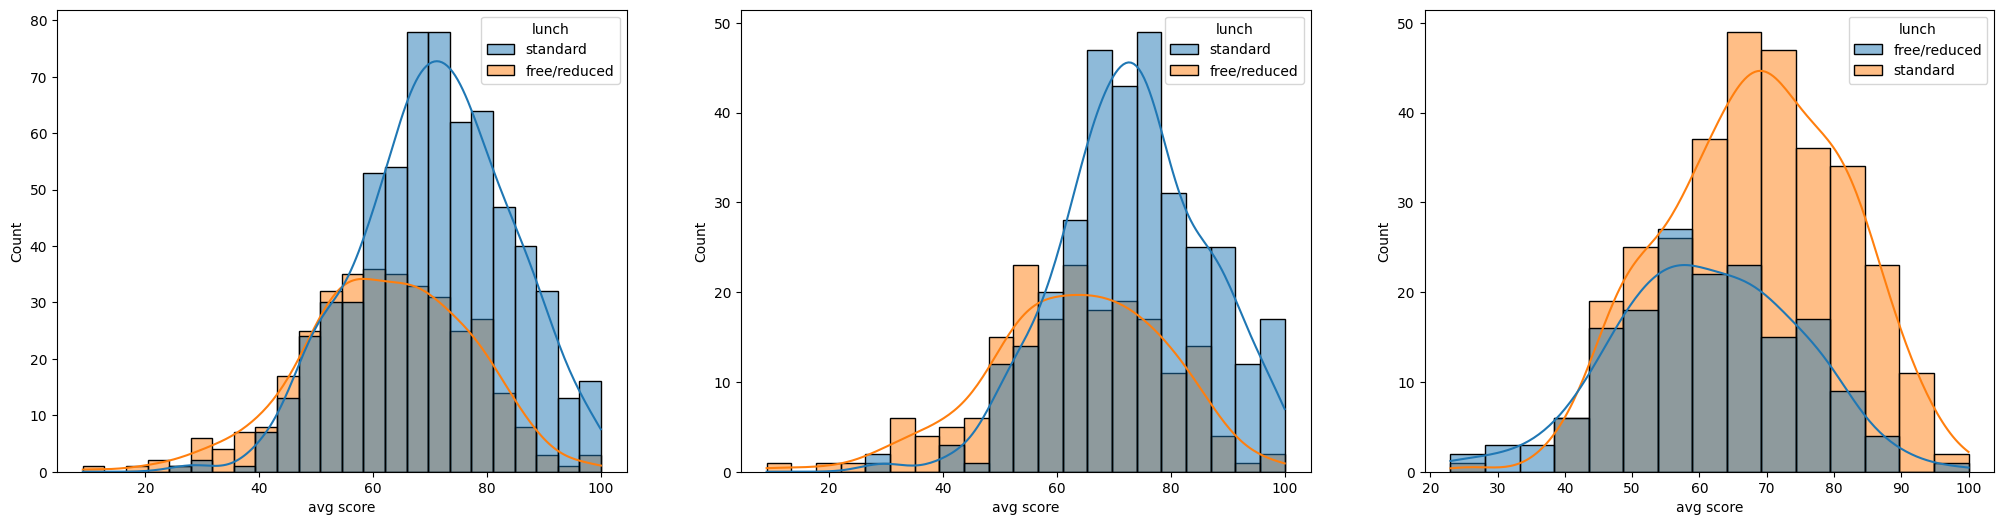

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='avg score',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='avg score',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='avg score',kde=True,hue='lunch')
plt.show()

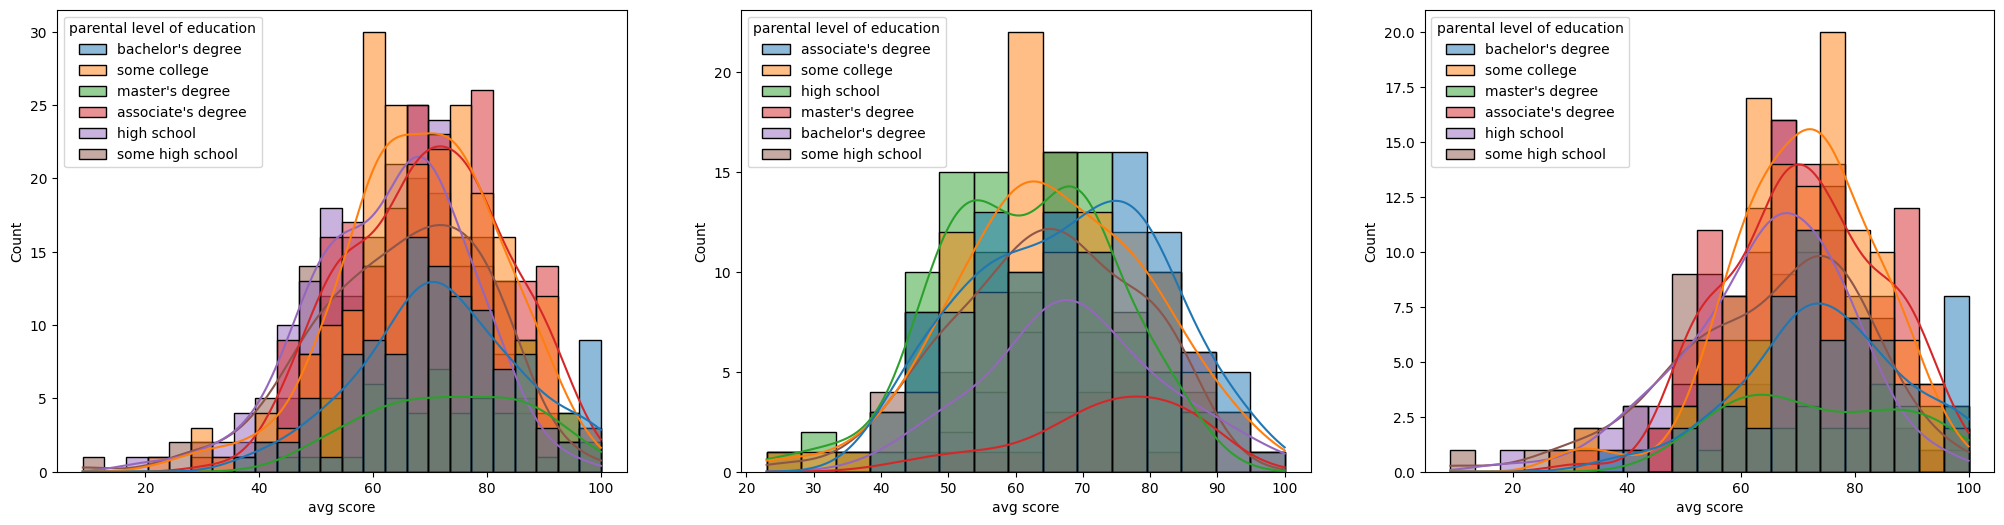

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
ax =sns.histplot(data=df,x='avg score',kde=True,hue='parental level of education')
plt.subplot(1,3,2)
ax =sns.histplot(data=df[df.gender=='male'],x='avg score',kde=True,hue='parental level of education')
plt.subplot(1,3,3)
ax =sns.histplot(data=df[df.gender=='female'],x='avg score',kde=True,hue='parental level of education')
plt.show()

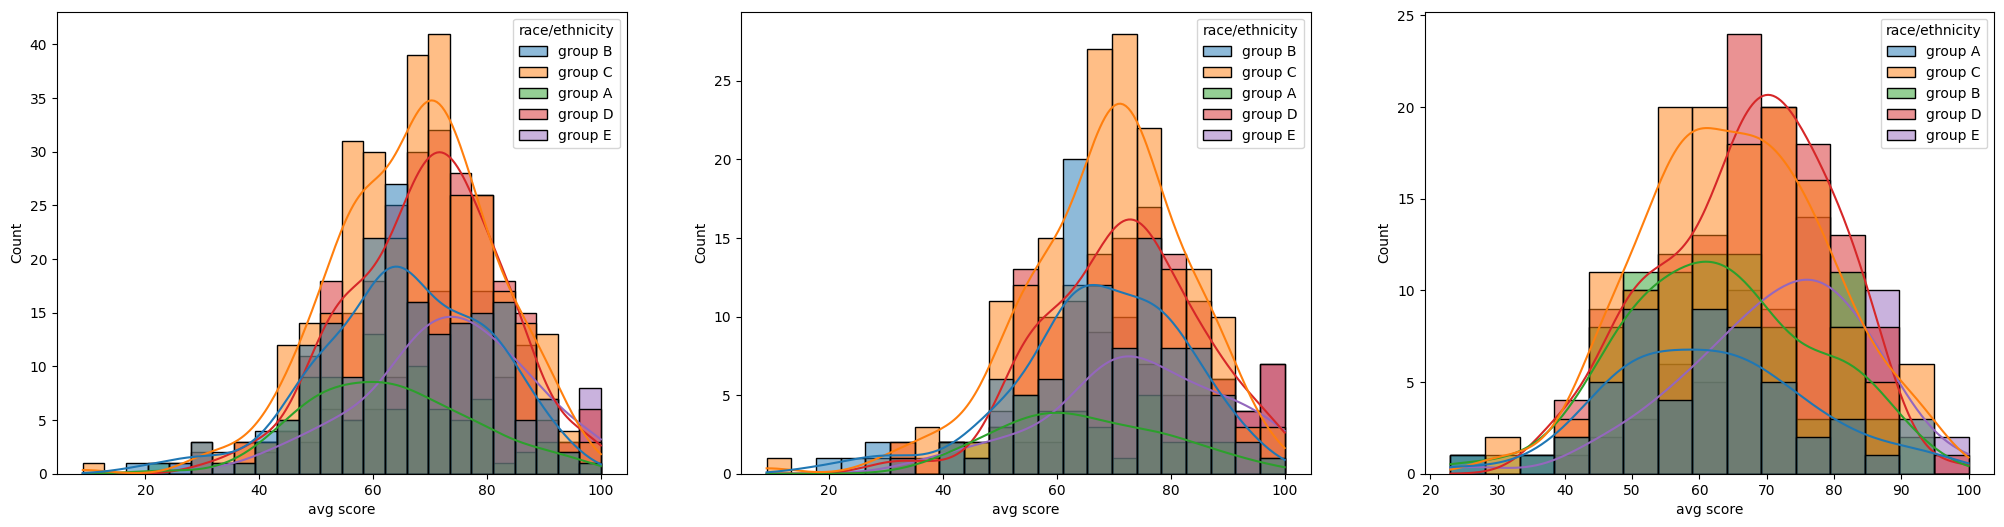

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
ax =sns.histplot(data=df,x='avg score',kde=True,hue='race/ethnicity')
plt.subplot(1,3,2)
ax =sns.histplot(data=df[df.gender=='female'],x='avg score',kde=True,hue='race/ethnicity')
plt.subplot(1,3,3)
ax =sns.histplot(data=df[df.gender=='male'],x='avg score',kde=True,hue='race/ethnicity')
plt.show()

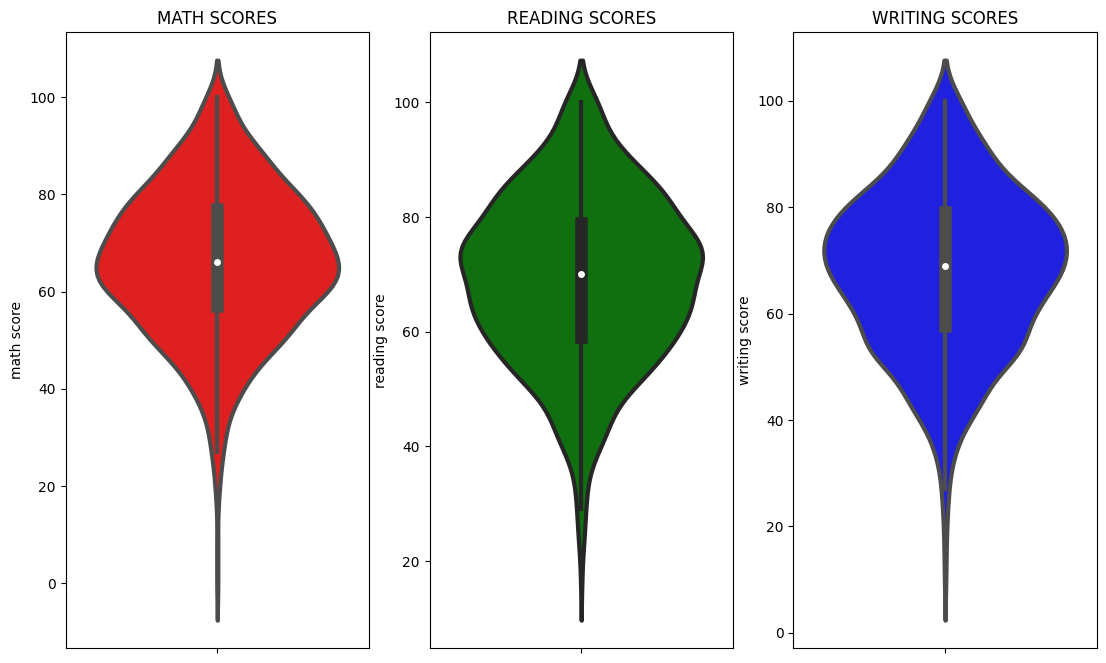

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Multivariate analysis using pieplot

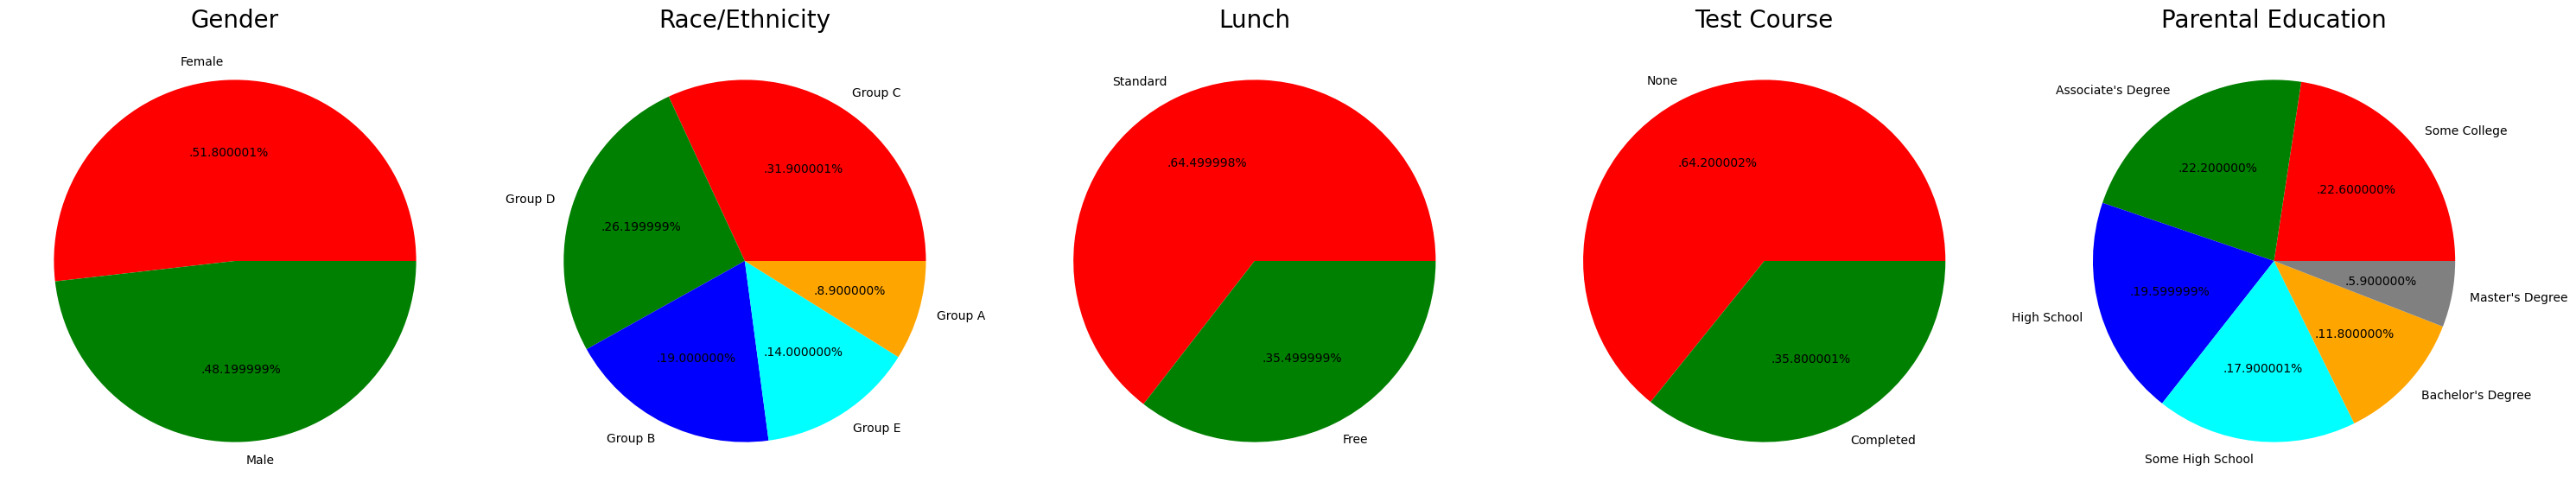

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)

size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color,labels=labels, autopct= '.%2f%%')
plt.title('Gender',fontsize = 20)

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Univariate Analysis

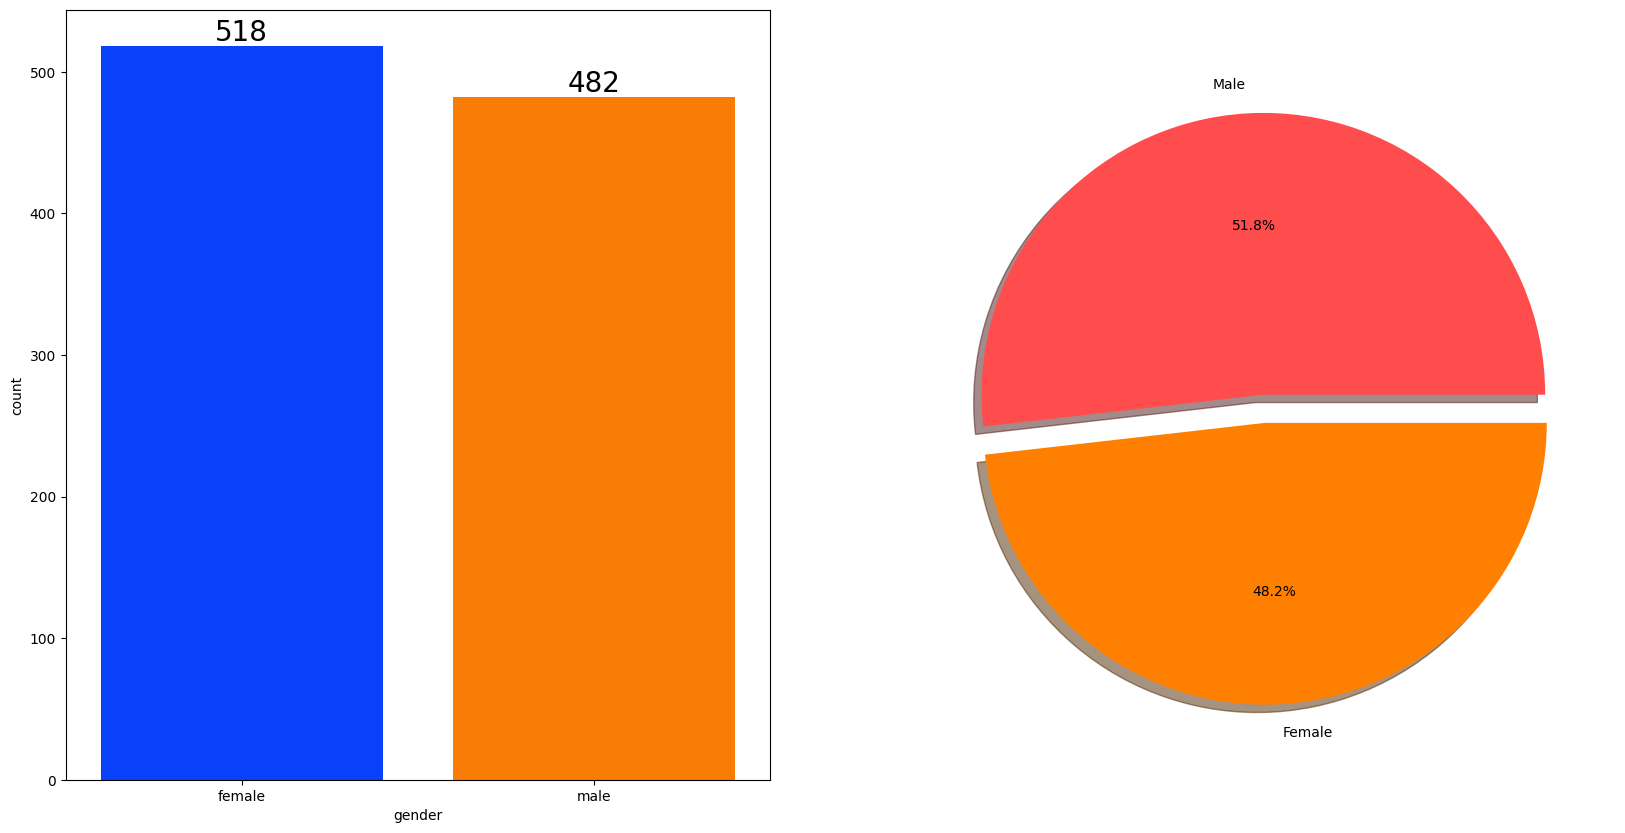

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [52]:
gender_group = df.groupby('gender').mean('avg score')
gender_group

,math score,reading score,writing score,total score,avg score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


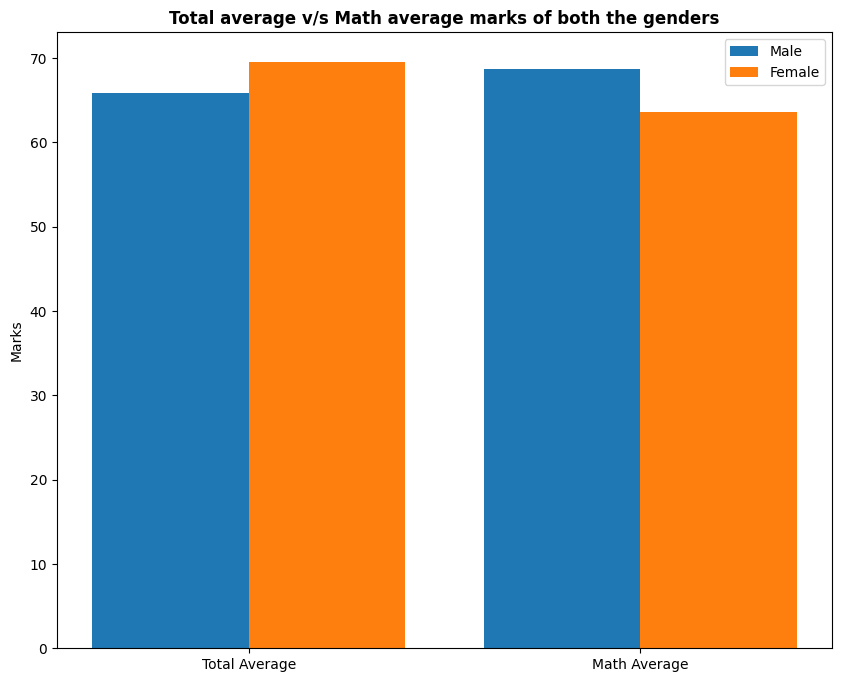

In [55]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg score'][0], gender_group['math score'][0]]
male_scores = [gender_group['avg score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

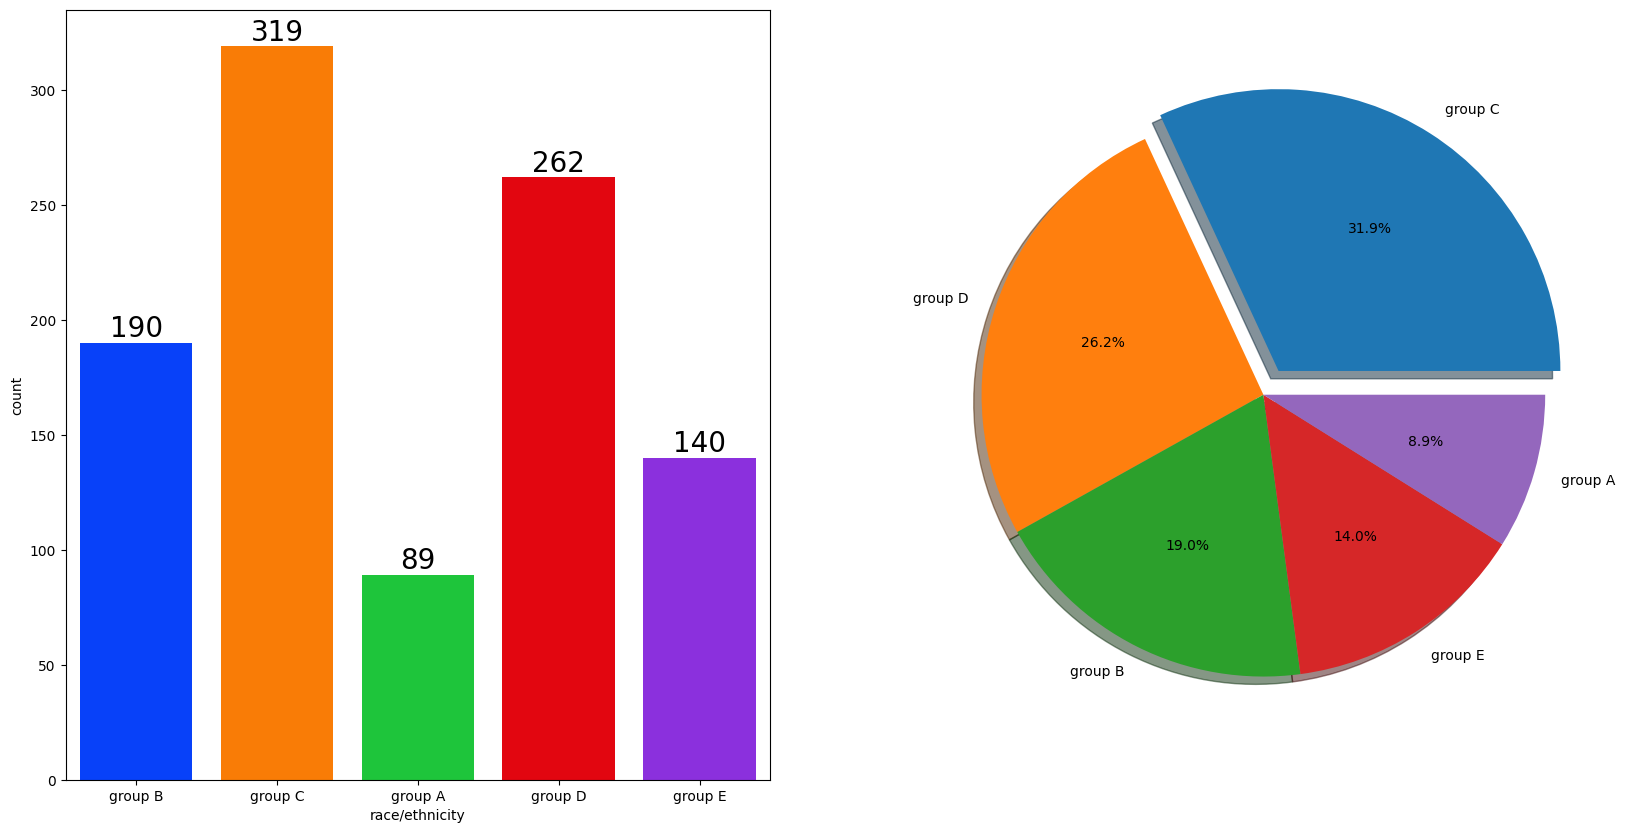

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

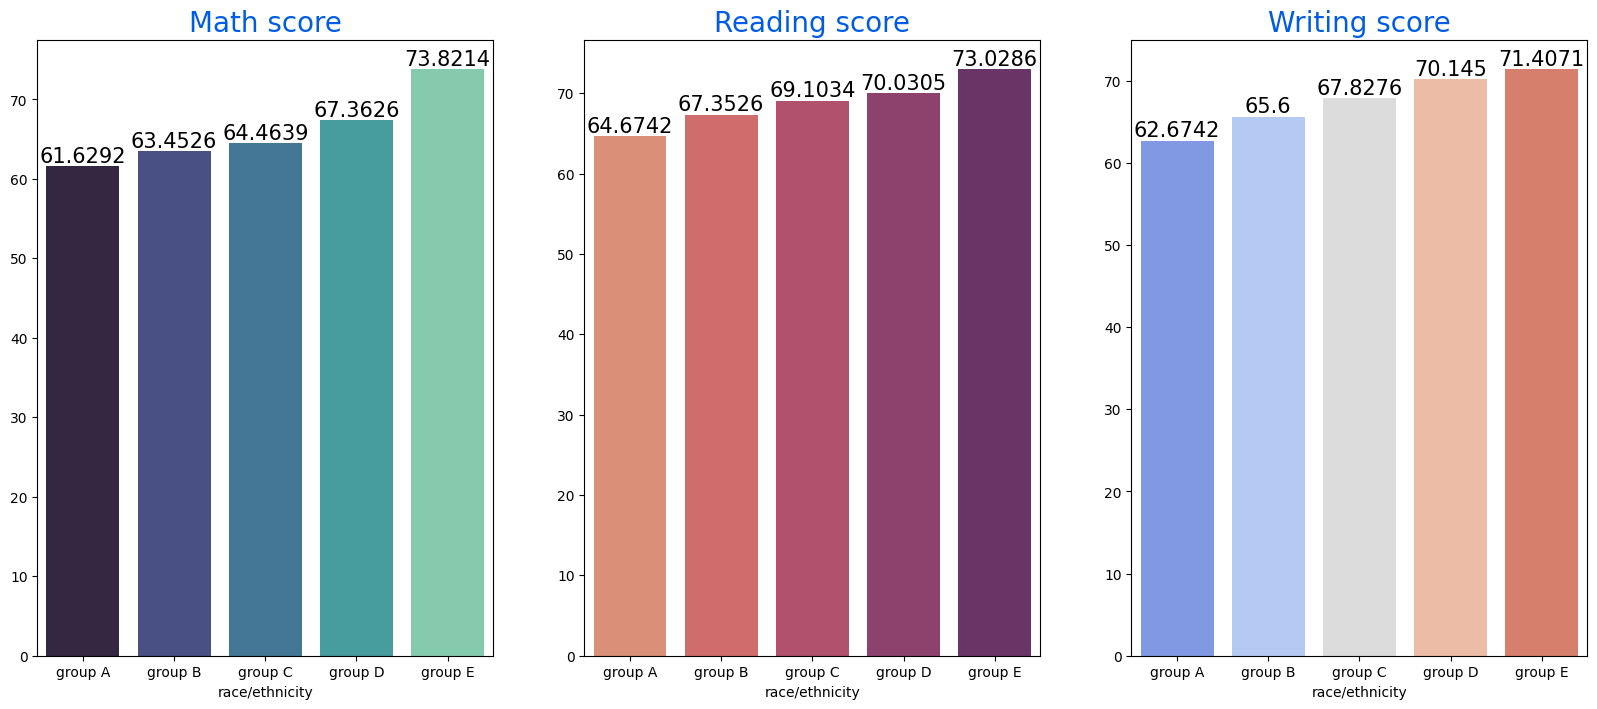

In [57]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

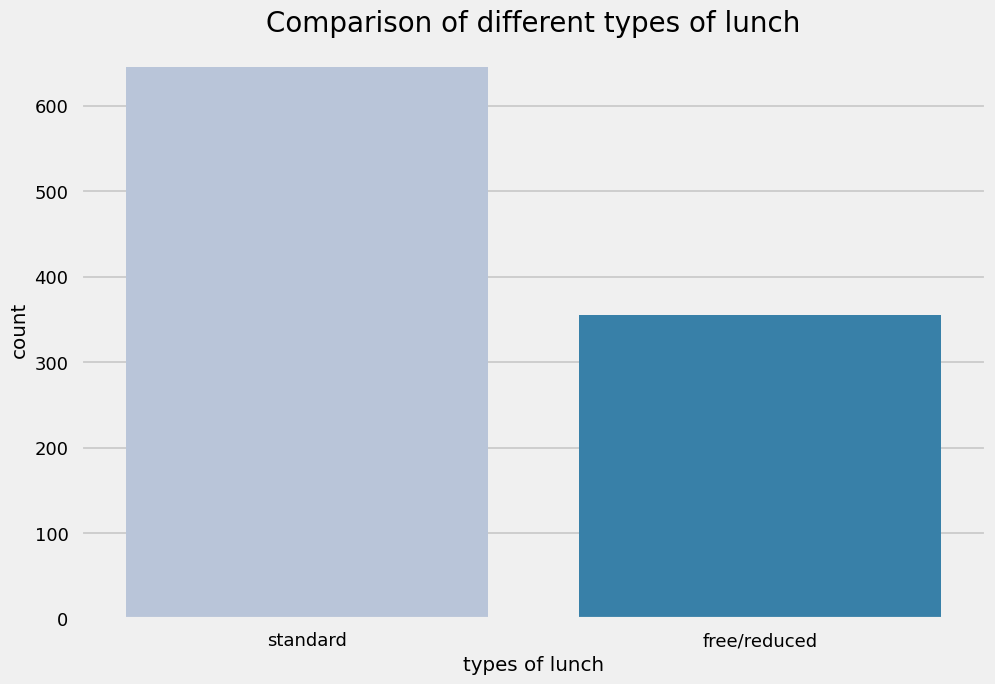

In [61]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x = df['lunch'],data = df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: xlabel='gender', ylabel='writing score'>

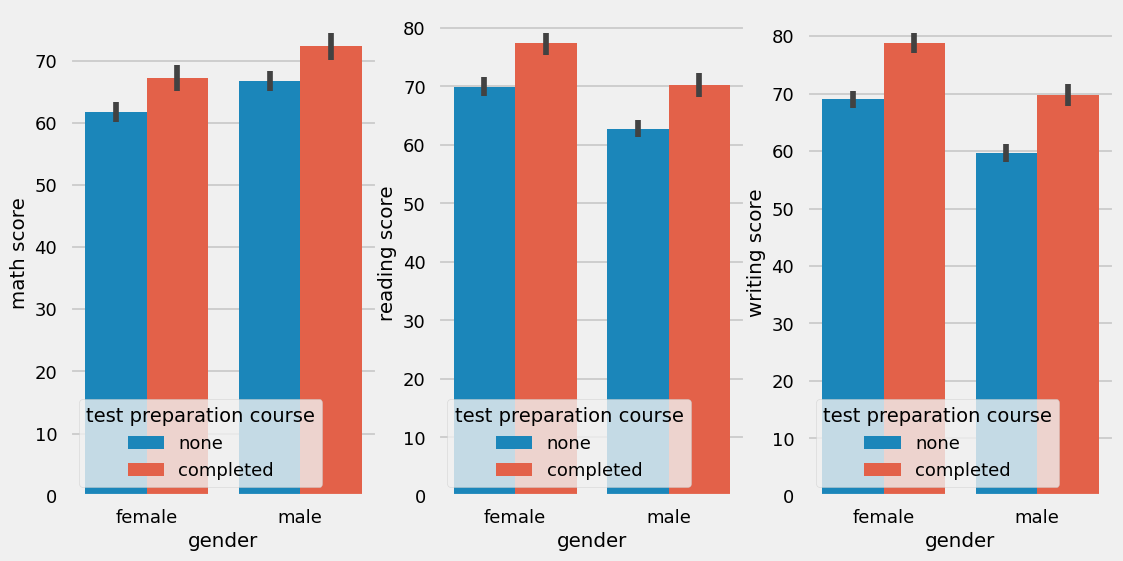

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['gender'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,3,2)
sns.barplot (x=df['gender'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,3,3)
sns.barplot (x=df['gender'], y=df['writing score'], hue=df['test preparation course'])

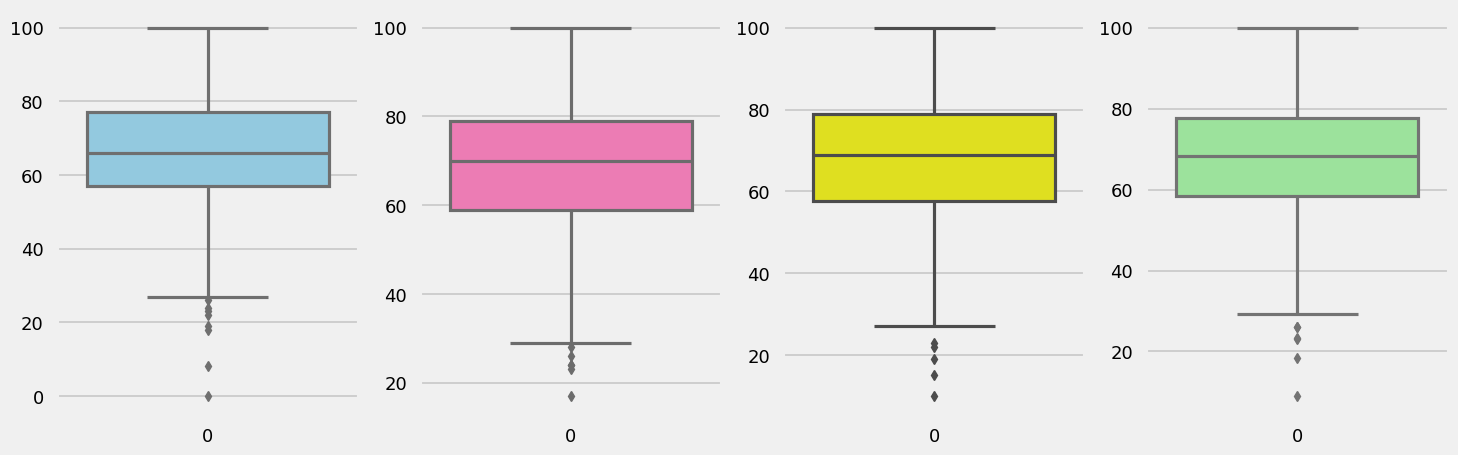

In [69]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg score'],color='lightgreen')
plt.show()

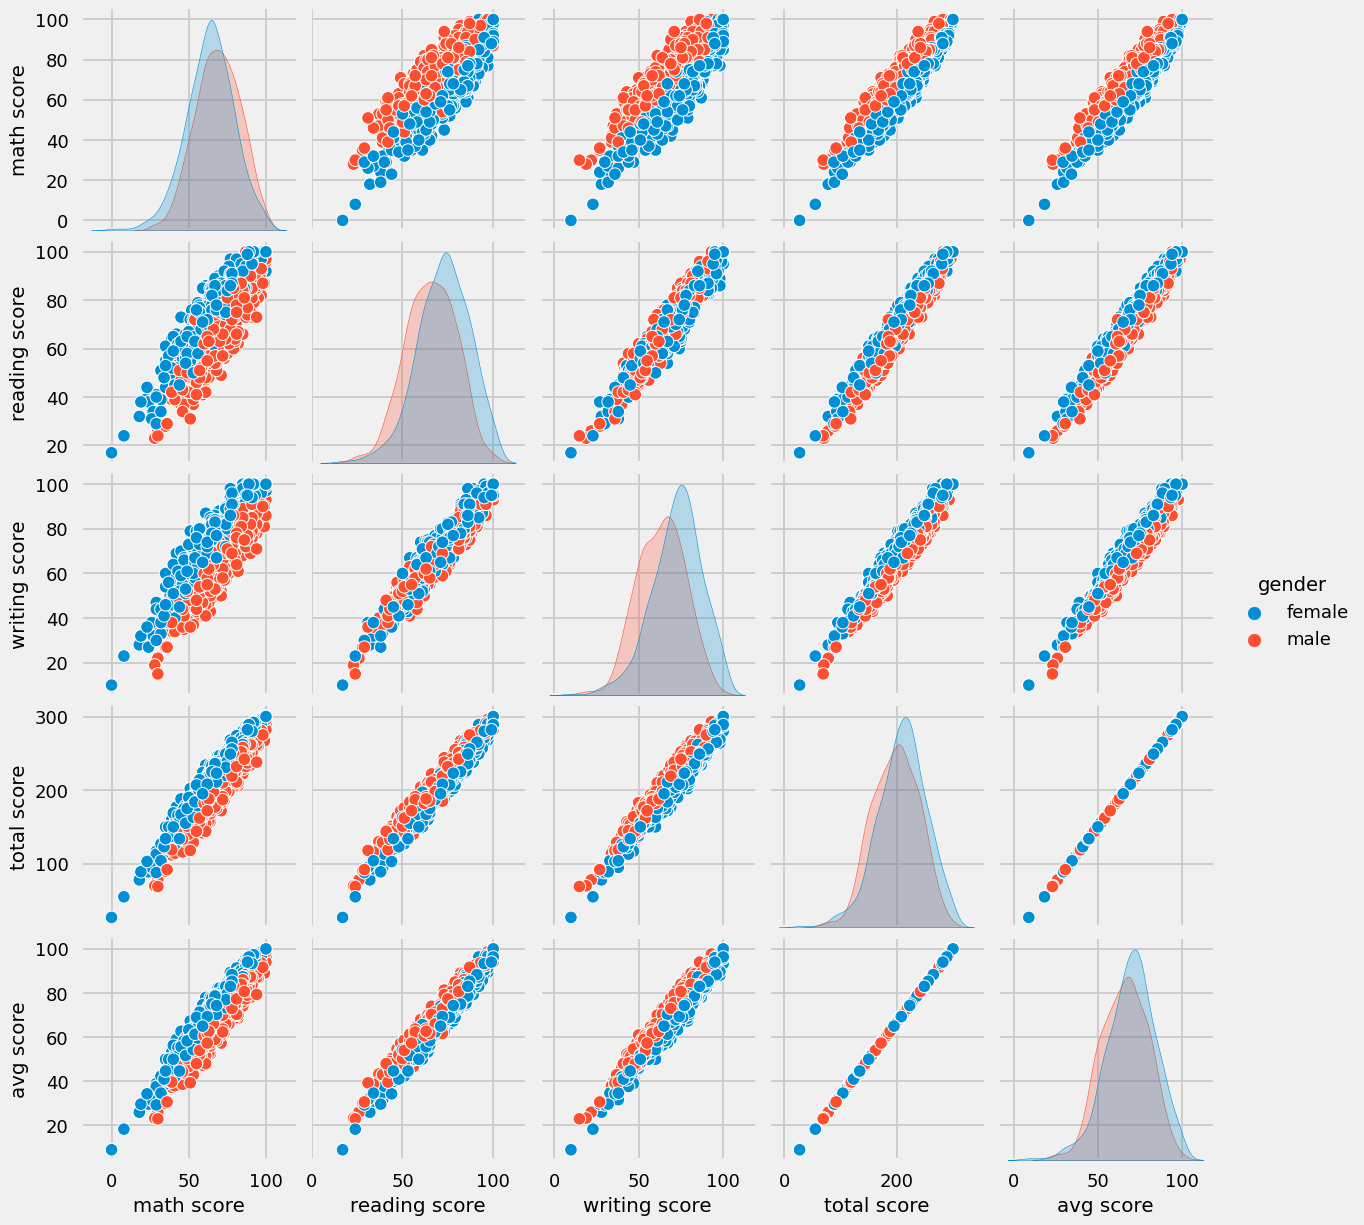

In [70]:
sns.pairplot(df,hue = 'gender')
plt.show()

Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.